In [14]:
import cv2
from os.path import basename
from glob import glob

import matplotlib.pyplot as plt

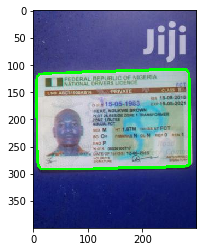

In [37]:
import cv2
import numpy as np

img = cv2.imread('Drivers_license/DL16.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
invGamma = 1.0 / 0.3
table = np.array([((i / 255.0) ** invGamma) * 255
for i in np.arange(0, 256)]).astype("uint8")

# apply gamma correction using the lookup table
gray = cv2.LUT(gray, table)

ret,thresh1 = cv2.threshold(gray,80,255,cv2.THRESH_BINARY)

#thresh = cv2.adaptiveThreshold(gray,255,1,1,11,2)
_, contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def biggestRectangle(contours):
    biggest = None
    max_area = 0
    indexReturn = -1
    for index in range(len(contours)):
            i = contours[index]
            area = cv2.contourArea(i)
            if area > 100:
                peri = cv2.arcLength(i,True)
                approx = cv2.approxPolyDP(i,0.1*peri,True)
                if area > max_area: #and len(approx)==4:
                        biggest = approx
                        max_area = area
                        indexReturn = index
    return indexReturn

indexReturn = biggestRectangle(contours)
hull = cv2.convexHull(contours[indexReturn])
cv2.imwrite('Drivers_license/hola.png',cv2.drawContours(img, [hull], 0, (0,255,0),3))
#cv2.imwrite('hola.png',thresh1)
image1 = cv2.imread('Drivers_license/hola.png')
plt.imshow(image1)